In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# installing the imb-learn library for smote
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#importing the PIMA Diabetes dataset
dataset=pd.read_csv ("C:\\Users\\mithu\\Desktop\\Simplilearn\\capstone\\project2\\Project 2\\health care diabetes.csv")

In [4]:
#To see first few coloumns of the dataset.
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#checking the null values in the dataset.
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Inference: The dataset seems to have no null values

In [6]:
#checking the size of the dataset.
dataset.shape

(768, 9)

#### Inference: Dataset has 768 rows and 9 columns

In [7]:
#checking the statsitical description of the dataset.
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Inference: Dataset variables like Glucose, BloodPressure, Insulin and BMI show the minimum values as 0. But from the outset of the medical purpose of these values.They cannot be 0 for a person.To me it seems like these values have been not recorded. So logically these are missing values

<AxesSubplot:ylabel='Frequency'>

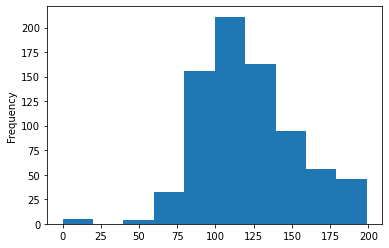

In [8]:
#There is a need to address the issue of values with value zero and replace it.
#The missing values have to be replaced based on the distrubution.
#We will address that by first taking the data distrubution into consideration.
#it will have to be replaced by mean, median, modal value based on logical need.

# Plotting histogram for Glucose to see data distribution
dataset['Glucose'].plot.hist()

#### Inference: Data distribution seems almost like guassian distribution, the missing values can be imputed by 'mean value'.

<AxesSubplot:ylabel='Frequency'>

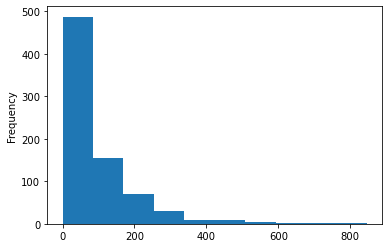

In [9]:
# Plotting histogram for Insulin to see data distribution
dataset['Insulin'].plot.hist()

#### Inference: The data distrubution is skewed to the right, Impute the missing values by 'median value'

<AxesSubplot:ylabel='Frequency'>

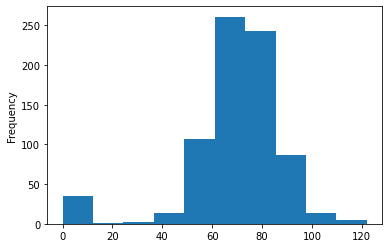

In [10]:
# Plotting histogram for BloodPressure to see data distribution
dataset['BloodPressure'].plot.hist()

#### Inference: Data distribution seems almost like guassian distribution, imputation can be done using 'mean value'.

<AxesSubplot:ylabel='Frequency'>

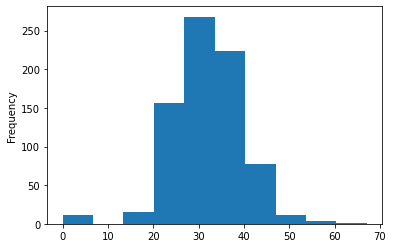

In [11]:
# Plotting histogram for BMI to see data distribution
dataset['BMI'].plot.hist()

#### Inference: Data distribution seems almost like guassian distribution, imputation could be done using 'mean value'.

#### Imputing '0' value with logically appropriate values for the Glucose, Insulin, BloodPressure, BMI, based on the distribution

In [12]:
dataset['Glucose']=dataset['Glucose'].replace(0,dataset['Glucose'].mean())

In [13]:
dataset['Insulin']=dataset['Insulin'].replace(0,dataset['Insulin'].median())

In [14]:
dataset['BloodPressure']=dataset['BloodPressure'].replace(0,dataset['BloodPressure'].mean())

In [15]:
dataset['BMI']=dataset['BMI'].replace(0,dataset['BMI'].mean())

In [16]:
dataset['Glucose'].value_counts()



99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64

In [17]:
dataset['Insulin'].value_counts()

30.5     374
105.0     11
130.0      9
140.0      9
120.0      8
        ... 
73.0       1
171.0      1
255.0      1
52.0       1
112.0      1
Name: Insulin, Length: 186, dtype: int64

In [18]:
dataset['BloodPressure'].value_counts()

70.000000     57
74.000000     52
78.000000     45
68.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
69.105469     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
86.000000     21
58.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
100.000000     3
106.000000     3
98.000000      3
110.000000     3
55.000000      2
108.000000     2
104.000000     2
46.000000      2
30.000000      2
122.000000     1
95.000000      1
102.000000     1
61.000000      1
24.000000      1
38.000000      1
40.000000      1
114.000000     1
Name: BloodPressure, dtype: int64

In [19]:
dataset['BMI'].value_counts()

32.000000    13
31.600000    12
31.200000    12
31.992578    11
32.400000    10
             ..
36.700000     1
41.800000     1
42.600000     1
42.800000     1
46.300000     1
Name: BMI, Length: 248, dtype: int64

## (Data Exploration)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

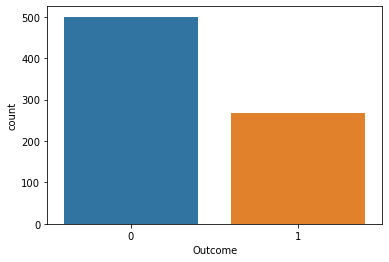

In [20]:
#creating a Countplot to see the various variables.
sns.countplot(x='Outcome',data=dataset)

In [21]:
#creating two seperate datasets based on outcomes 1 and 0

dataset_out1=dataset[dataset["Outcome"]==1]

dataset_out2=dataset[dataset["Outcome"]==0]

In [22]:
dataset_out1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
2,8,183.0,64.0,0,30.5,23.3,0.672,32,1
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45,543.0,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39,110.0,36.5,1.057,37,1
757,0,123.0,72.0,0,30.5,36.3,0.258,52,1
759,6,190.0,92.0,0,30.5,35.5,0.278,66,1
761,9,170.0,74.0,31,30.5,44.0,0.403,43,1


In [23]:
dataset_out2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29,30.5,26.6,0.351,31,0
3,1,89.0,66.000000,23,94.0,28.1,0.167,21,0
5,5,116.0,74.000000,0,30.5,25.6,0.201,30,0
7,10,115.0,69.105469,0,30.5,35.3,0.134,29,0
10,4,110.0,92.000000,0,30.5,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.000000,0,30.5,22.5,0.142,33,0
763,10,101.0,76.000000,48,180.0,32.9,0.171,63,0
764,2,122.0,70.000000,27,30.5,36.8,0.340,27,0
765,5,121.0,72.000000,23,112.0,26.2,0.245,30,0


In [24]:
dataset_out1.shape

(268, 9)

In [25]:
dataset_out2.shape

(500, 9)

In [26]:
268/768

0.3489583333333333

#### Findings: There seems to be a 1.86:1 ratio (Class Imbalance) between the outcome "0" and outcome "1", 34.8% of the data has a positive outcome.

#### Comment:This is a mildly imbalanced dataset. The data can be balanced by using a few techniques like data augumentation, Smote, Resampling

#### SMOTE is used to synthesize data where the features are continuous and it is a classification problem statement.

## Course of action:Using the SMOTE technique to resample the data

In [27]:
# creating dependant and independant features
columns=dataset.columns.tolist()
# Making a list of columns apart from 'Outcome'
columns=[c for c in columns if c not in ["Outcome"]]
# store the variable we are predicting
target="Outcome"
X=dataset[columns]
Y=dataset[target]

In [28]:
#importing SMOTE for handling imbalanced data.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
columns_resampled, target_resampled = sm.fit_resample(X,Y)

In [29]:
columns_resampled.shape

(1000, 8)

In [30]:
target_resampled.shape

(1000,)

In [31]:
#creating a resampled dataframe
dataset_resampled=pd.concat([columns_resampled,target_resampled],axis=1)

In [32]:
dataset_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35,30.500000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29,30.500000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,0,30.500000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,4,112.068692,72.931308,34,104.793923,31.326706,0.583229,31,1
996,2,130.572457,65.144914,39,30.500000,35.775023,0.248374,25,1
997,8,149.874944,82.500045,45,238.499955,36.475033,0.972876,46,1
998,3,115.656818,79.737273,0,30.500000,31.043761,0.410639,57,1


In [33]:
#creating two seperate datasets based on outcomes 1 and 0 for the resampled data

dataset_res_out1=dataset_resampled[dataset_resampled["Outcome"]==1]

dataset_res_out2=dataset_resampled[dataset_resampled["Outcome"]==0]

<AxesSubplot:xlabel='Outcome', ylabel='count'>

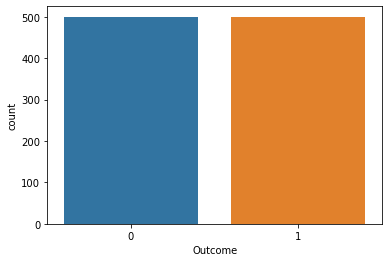

In [34]:
#creating a Countplot to see the class ratio after resampling.
sns.countplot(x='Outcome',data=dataset_resampled)

#### Comment: The classes are now balanced by SMOTE

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

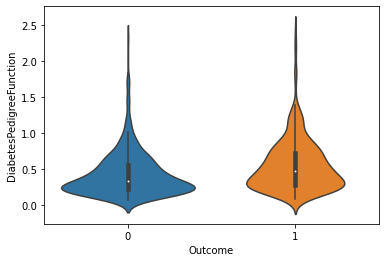

In [35]:
#checking the diabetes pedegree function between diabetics and non-diabetics
sns.violinplot(data=dataset_resampled, x="Outcome",y="DiabetesPedigreeFunction")


#### Findings: diabetics seem to have a higher pedigree function than non diabetics

## Creating scatterplots to see the relationship between data using the resampled dataset.

#### Comment: Domain knowledge comes into picture to understand the the intricacies here.

<function matplotlib.pyplot.show(close=None, block=None)>

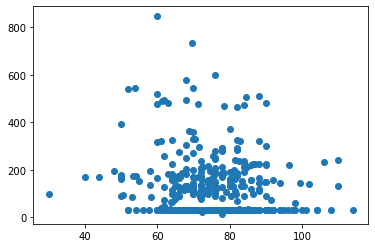

In [36]:
plt.scatter(dataset_res_out1['BloodPressure'],dataset_res_out1['Insulin'])
plt.show

#### Findings: The maximum patients fall in the blood pressure range around 80(if it is systolic, the BP is normal), the insulin values are around 200 for these patients.

<function matplotlib.pyplot.show(close=None, block=None)>

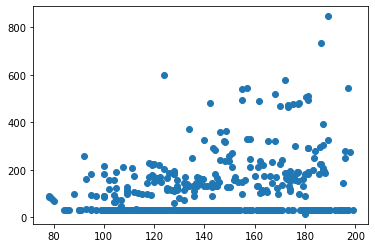

In [37]:
plt.scatter(dataset_res_out1['Glucose'],dataset_res_out1['Insulin'])
plt.show

#### Findings: The glucose levels for maximum Number of patients lie within 100 to 180 and insulin levels fall in the 200 range.

<function matplotlib.pyplot.show(close=None, block=None)>

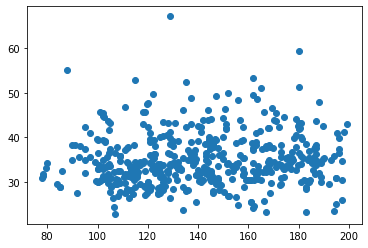

In [38]:
plt.scatter(dataset_res_out1['Glucose'],dataset_res_out1['BMI'])
plt.show

#### Findings: The BMI for maximum number of patients is around the 30-40 range, overall the patients seem overweight.

<function matplotlib.pyplot.show(close=None, block=None)>

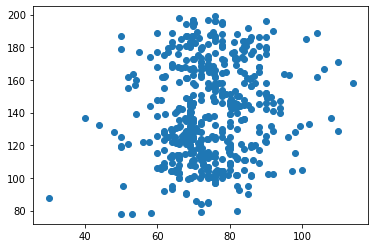

In [39]:
plt.scatter(dataset_res_out1['BloodPressure'],dataset_res_out1['Glucose'])
plt.show

#### Findings: It seems that higher value of BP is having lower values of insulin.


<function matplotlib.pyplot.show(close=None, block=None)>

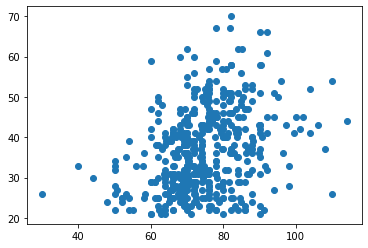

In [40]:
plt.scatter(dataset_res_out1['BloodPressure'],dataset_res_out1['Age'])
plt.show

#### The BP range of 100 is around ages 40+

## Correlation analysis using Heatmap.

<AxesSubplot:>

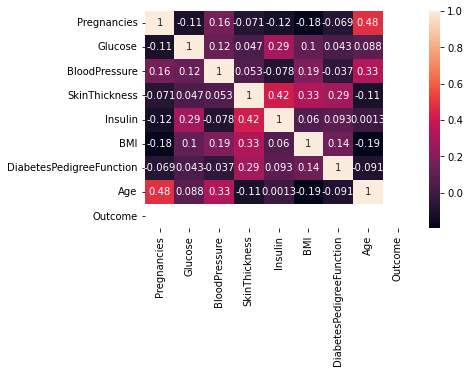

In [41]:
sns.heatmap(dataset_res_out1.corr(),annot=True)

#### Findings: From the correlation map, the variables that have a higher correlation are 
* Age & Pregnancies
* Insulin & Skin Thickness
* BMI & Skin thickness

#### Plotting scatter plots for variables with a higher level of correlation

<function matplotlib.pyplot.show(close=None, block=None)>

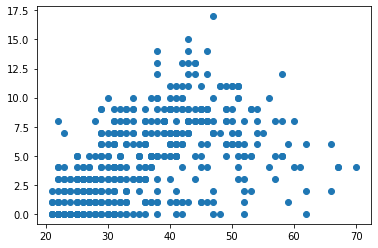

In [42]:
#plotting scatterplot for Age against & Pregnancies
plt.scatter(dataset_res_out1['Age'],dataset_res_out1['Pregnancies'])
plt.show

#### Findings: The maximum pregancies were found to be in women from 20 to 40 years of age

<function matplotlib.pyplot.show(close=None, block=None)>

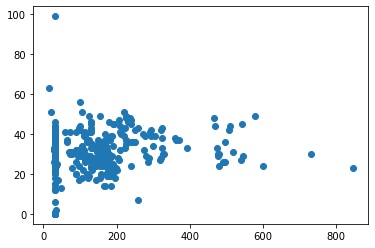

In [43]:
#plotting scatterplot for Insulin against & Skin Thickness
plt.scatter(dataset_res_out1['Insulin'],dataset_res_out1['SkinThickness'])
plt.show

#### Findings: THe skin thickness lies in betwen 20 and 50 while the insulin levels are concenterated around 150-200.

<function matplotlib.pyplot.show(close=None, block=None)>

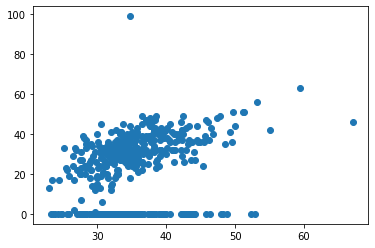

In [44]:
#plotting scatterplot for BMI against & Skin Thickness
plt.scatter(dataset_res_out1['BMI'],dataset_res_out1['SkinThickness'])
plt.show

#### Findings: In most patients, the skin thickness lies around 35 while the skin thickness has median value around 40.

# (Data Modelling)

## Feature Scaling

#### Thoughts: There are variables or features following different scales of magnitude. The data needs to be scaled before proceeding further. 


#### We use standard scaler for the scaling of data 

In [45]:
#Splitting the resampled data into dependent and independent variables
B = dataset_resampled.Outcome
a = dataset_resampled.drop('Outcome', axis = 1)
columns = a.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
A = scaler.fit_transform(a)
data_a = pd.DataFrame(A, columns = columns)

In [46]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

#### We have now scaled the features

## Dividing the data into Train_Test_Split

#### We now divide the data at 80 train 20 test ratio in order to test the model. The data has already been resampled using smote technique earlier.


In [47]:
#Splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_a, B, test_size = 0.2, random_state = 40)

## Applying Different ML Algorithms to see which gives the best results in comparison with KNN model.

### Applying logistic regression:

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_LR = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


### Applying SVM:

In [49]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(x_train, y_train)
y_pred_SVM = classifier_rbf.predict(x_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))

Accuracy of SVC (RBF) classifier on test set: 0.79


### Applying KNN Algorithm

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
print('Accuracy of KNN classifier on test set: {:.2f}'. format(knn.score(x_test,y_test)))

Accuracy of KNN classifier on test set: 0.77


### Applying Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred_RF = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of Random Forest on test set: 0.83


### Applying Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
C1DT=DecisionTreeClassifier()
C1DT.fit(x_train, y_train)
y_pred_C1DT = C1DT.predict(x_test)
print('Accuracy of Decision Tree on test set: {:.2f}'.format(C1DT.score(x_test, y_test)))

Accuracy of Decision Tree on test set: 0.76


#### Thoughts: From the above it seems that Random Forest algorithm works best for the data distribution with a score of 84%

### Creating the confusion matrix and classification report.

In [53]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print("cm", confusion_matrix(y_pred_RF,y_test))

cm [[82 15]
 [18 85]]


In [54]:
#classification report
from sklearn.metrics import classification_report
print("Classification Report", classification_report(y_pred_RF,y_test))

Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.83        97
           1       0.85      0.83      0.84       103

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200



In [55]:
#accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy Score", accuracy_score(y_pred_RF,y_test))

Accuracy Score 0.835


In [56]:
x_pred = model.predict(x_train)
print("Accuracy Score", accuracy_score(x_pred,x_pred))

Accuracy Score 1.0


#### The insights in this case where train data is predicted in itself by the alogorithm. The data seems to be overfitting. Although this is just for understanding, overfitting can be reduced by techniques like
* Cross Validation
* Data Augumentation
* Feature Selection

### saving the models. 


In [57]:
#saving random forest model
import joblib
filename_RF='RandomForest_Model.sav'
joblib.dump(model,filename_RF)



['RandomForest_Model.sav']

In [58]:
#saving SVM model
filename_SVM='SVM_Model.sav'
joblib.dump(classifier_rbf,filename_SVM)

['SVM_Model.sav']

In [59]:
#saving Logistic Regression model
filename_LR='LR_Model.sav'
joblib.dump(logreg,filename_LR)

['LR_Model.sav']

In [60]:
#saving KNN model
filename_KNN='KNN_Model.sav'
joblib.dump(knn,filename_KNN)

['KNN_Model.sav']

In [61]:
#saving Decision Tree model
filename_DT='DT_Model.sav'
joblib.dump(C1DT,filename_DT)

['DT_Model.sav']

### Doing some predictions from the saved model

In [62]:
model1=joblib.load('RandomForest_Model.sav')
y_pred1=model1.predict(x_test)
y_pred1

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1], dtype=int64)

### These saved models are used to further deploy on cloud.

In [63]:
### using the model to predict some real time cases
Pregnancies=1
Glucose=120
BloodPressure=70
SkinThickness=30
Insulin=150
BMI=30
DiabetesPedigreeFunction=0.65
Age=22
outputrealtime=model1.predict([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
print("The person is diabetes +ve if 1 and -ve if 0:", outputrealtime)

The person is diabetes +ve if 1 and -ve if 0: [0]


C:\Users\mithu\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### Analysing Sensitivity And Specifity of model
* sensitivity= true positive/(true positive + false negative)
* specificity= true negative/(true negative + false positive)

In [64]:
# Creating Confusion Matrix for logistic regression model
cmLR=confusion_matrix(y_pred_LR,y_test)
print("Confusion_Matrix_LR:",cmLR)


Confusion_Matrix_LR: [[82 28]
 [18 72]]


In [65]:
#Checking sensitivity and specificity for LR model
sensitivityLR = cmLR[0,0]/(cmLR[0,0]+cmLR[0,1])
print('Sensitivity for LR model: ', sensitivityLR )
specificityLR = cmLR[1,1]/(cmLR[1,0]+cmLR[1,1])
print('Specificity for LR model: ', specificityLR )

Sensitivity for LR model:  0.7454545454545455
Specificity for LR model:  0.8


In [66]:
# Creating Confusion Matrix for Random Forest model
cmRF=confusion_matrix(y_pred_RF,y_test)
print("Confusion_Matrix_RF:",cmRF)

Confusion_Matrix_RF: [[82 15]
 [18 85]]


In [67]:
#Checking sensitivity and specificity for RF model
sensitivityRF = cmRF[0,0]/(cmRF[0,0]+cmRF[0,1])
print('Sensitivity for RF model: ', sensitivityRF )
specificityRF = cmRF[1,1]/(cmRF[1,0]+cmRF[1,1])
print('Specificity for RF model: ', specificityRF )

Sensitivity for RF model:  0.845360824742268
Specificity for RF model:  0.8252427184466019


In [68]:
# Creating Confusion Matrix for Decision Tree model
cmC1DT=confusion_matrix(y_pred_C1DT,y_test)
print("Confusion_Matrix_C1DT:",cmC1DT)

Confusion_Matrix_C1DT: [[75 24]
 [25 76]]


### Creating AUC ROC curve for the models.

AUC for Logistic Regression Model: 0.8497999999999999


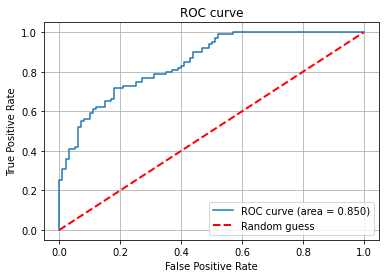

In [69]:
from sklearn import metrics
PredY_LR=logreg.predict_proba(x_test)
fpr, tpr, thresh = metrics.roc_curve(y_test, PredY_LR[:,1])
auc = metrics.auc(fpr, tpr)
print("AUC for Logistic Regression Model:", auc)
plt.plot(fpr, tpr, label='ROC curve (area = %.3f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()


C:\Users\mithu\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


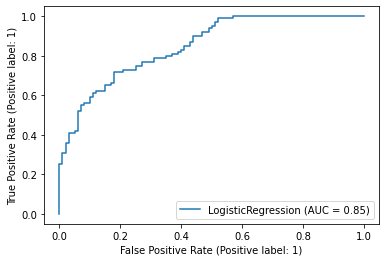

In [70]:
#creating AUC/ROC Curve for logistic regression model using sklearn
from sklearn import metrics
metrics.plot_roc_curve(logreg, x_test, y_test)
plt.show()

C:\Users\mithu\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


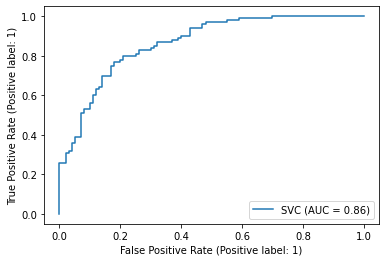

In [71]:
#creating AUC/ROC Curve for SVM model using sklearn
from sklearn import metrics
metrics.plot_roc_curve(classifier_rbf, x_test, y_test)
plt.show()

C:\Users\mithu\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


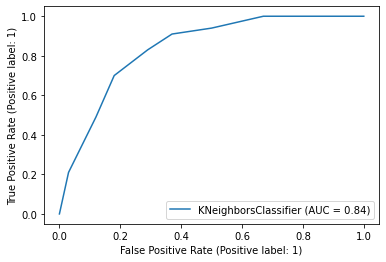

In [72]:
#creating AUC/ROC Curve for knn model using sklearn
metrics.plot_roc_curve(knn, x_test, y_test)
plt.show()

C:\Users\mithu\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


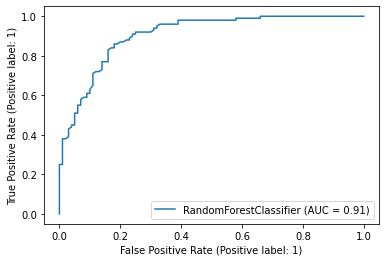

In [73]:
#creating AUC/ROC Curve for knn model using sklearn
metrics.plot_roc_curve(model, x_test, y_test)
plt.show()

C:\Users\mithu\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


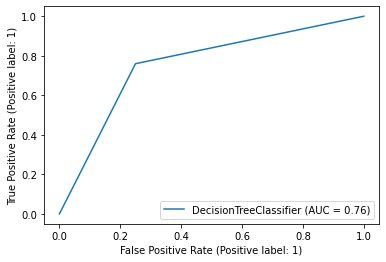

In [74]:
#creating AUC/ROC Curve for decision tree model using sklearn
metrics.plot_roc_curve(C1DT, x_test, y_test)
plt.show()

#### Inference: The KNN model seems to have the highest Area Under Curve for TPR vs FPR

## Data Prediction for a single line of data

In [75]:
x_train.iloc[[0]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
970,-0.600712,-0.251319,-0.122031,0.581146,0.688585,0.200715,-0.813809,-0.076036


In [76]:
model.predict(x_train.iloc[[0]])

array([1], dtype=int64)

## Pickling the model file for deployment

In [77]:
import pickle

In [78]:
pickle.dump(model,open('RFmodel.pkl','wb'))

In [79]:
pickled_RF_model=pickle.load(open('RFmodel.pkl','rb'))

In [80]:
pickled_RF_model.predict(x_train.iloc[[0]])

array([1], dtype=int64)